<a href="https://colab.research.google.com/github/30kirtana/ML-project/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier

In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
d=pd.read_csv("train.csv")
d.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [37]:
d.shape 

(7352, 563)

In [38]:
d.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [39]:
d.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [40]:
d['activity_code']= d.Activity.astype('category').cat.codes

In [41]:
d.activity_code

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: activity_code, Length: 7352, dtype: int8

In [42]:
d1=d.drop('Activity',axis=1)
d1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity_code
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,5
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,5
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,5
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,5


In [43]:
xcol=d1.columns.to_list()
xcol.pop(-1)
xdata=d1[xcol]
ycol='activity_code'

In [44]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test =train_test_split(d1[xcol],d1[ycol].values,test_size =0.1)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((6616, 562), (736, 562), (6616,), (736,))

In [46]:
y_test 

array([2, 0, 1, 5, 0, 2, 2, 4, 5, 2, 4, 3, 2, 2, 0, 0, 2, 3, 5, 4, 1, 0,
       1, 1, 2, 4, 2, 5, 0, 2, 0, 3, 1, 3, 3, 0, 5, 2, 4, 0, 3, 1, 1, 0,
       0, 0, 4, 2, 4, 1, 4, 1, 3, 0, 5, 4, 2, 5, 4, 5, 5, 0, 5, 3, 2, 0,
       2, 2, 0, 2, 2, 3, 5, 1, 1, 1, 1, 0, 2, 4, 0, 2, 0, 5, 1, 0, 2, 2,
       3, 0, 3, 5, 5, 0, 2, 2, 5, 5, 0, 2, 2, 1, 5, 1, 5, 4, 0, 0, 2, 3,
       1, 2, 0, 3, 0, 2, 3, 1, 3, 1, 3, 2, 5, 3, 2, 2, 4, 1, 1, 3, 3, 1,
       4, 1, 0, 4, 1, 5, 3, 1, 2, 0, 3, 2, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 3, 5, 5, 1, 0, 0, 4, 0, 1, 2, 1, 3, 1, 2, 0, 2, 4, 0, 1,
       1, 5, 5, 5, 1, 0, 2, 3, 2, 1, 1, 0, 4, 4, 3, 0, 5, 4, 2, 0, 0, 1,
       0, 0, 2, 1, 2, 3, 5, 1, 2, 3, 2, 5, 1, 0, 1, 0, 4, 1, 2, 5, 1, 1,
       0, 5, 2, 5, 0, 5, 1, 3, 0, 2, 0, 3, 4, 2, 1, 4, 0, 1, 0, 0, 2, 1,
       4, 2, 2, 3, 3, 1, 0, 4, 1, 0, 2, 1, 0, 0, 2, 0, 1, 3, 5, 2, 5, 3,
       5, 4, 0, 5, 5, 1, 2, 0, 1, 1, 3, 3, 4, 1, 4, 5, 4, 4, 3, 1, 0, 1,
       4, 4, 3, 3, 2, 0, 1, 1, 0, 0, 4, 1, 2, 0, 1,

In [47]:
#Build Decision Tree model using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
tdt = DecisionTreeClassifier().fit(x_train,y_train)
y_train_pred=tdt.predict(x_train)#predicting train data
y_test_pred=tdt.predict(x_test)

In [48]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))


Training Accuracy  1.0
Testing Accuracy  0.9565217391304348


In [49]:
classifiers = [
    DecisionTreeClassifier()
]

In [50]:
from sklearn.metrics import f1_score

In [51]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

In [52]:
score = f1_score(y_test_pred,y_test,average='macro')
print(score)


0.9544426340962687


In [53]:
pred = tdt.predict(x_test)

In [54]:
precision = precision_score(y_test, pred,pos_label='positive', average='micro')
recall = recall_score(y_test, pred,pos_label='positive',average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9565217391304348
Recall:  0.9565217391304348


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_features=1,random_state=42)
classifier.fit(x_train, y_train);

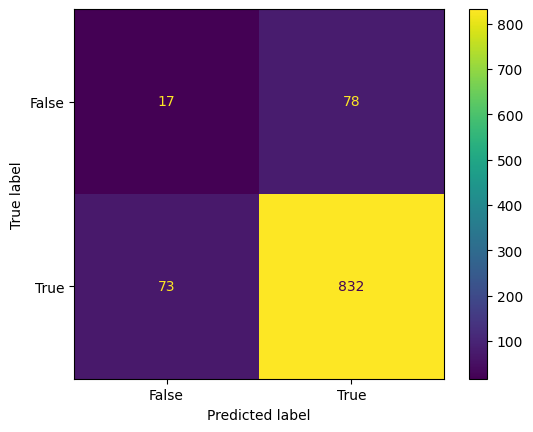

In [56]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


The Confusion Matrix created has four different quadrants:

True Negative (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Positive (Bottom-Right Quadrant)